In [2]:
!pip install pyforest

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


data dict:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf


# Import libraries

In [3]:
import pyforest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
# 1-Import Libraies

#!pip install lightgbm
#!pip install catboost

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
%matplotlib notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#Model Selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import KFold, cross_val_predict

#Feature Selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostClassifier


from xgboost import XGBClassifier
from xgboost import plot_importance

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.neural_network import MLPRegressor

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#Metrics
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_recall_curve
from sklearn.metrics import accuracy_score, recall_score, average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
def plot_multiclass_roc(model, X_test_scaled, y_test, n_classes, figsize=(5,5)):
    y_score = model.decision_function(X_test_scaled)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
    
def plot_multiclass_roc_for_tree(model, X_test_scaled, y_test, n_classes, figsize=(5,5)):
    y_score = model.predict_proba(X_test_scaled)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [6]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')

In [7]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
- Find unusual value in Weightlbs

In [8]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [9]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [10]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [11]:
df0= pd.concat([df_male,df_female], axis=0,ignore_index=True)

In [12]:
df = df0.copy()

In [13]:
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [15]:
df.isnull().sum().any()

True

In [16]:
df.duplicated().sum()

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


<IPython.core.display.Javascript object>


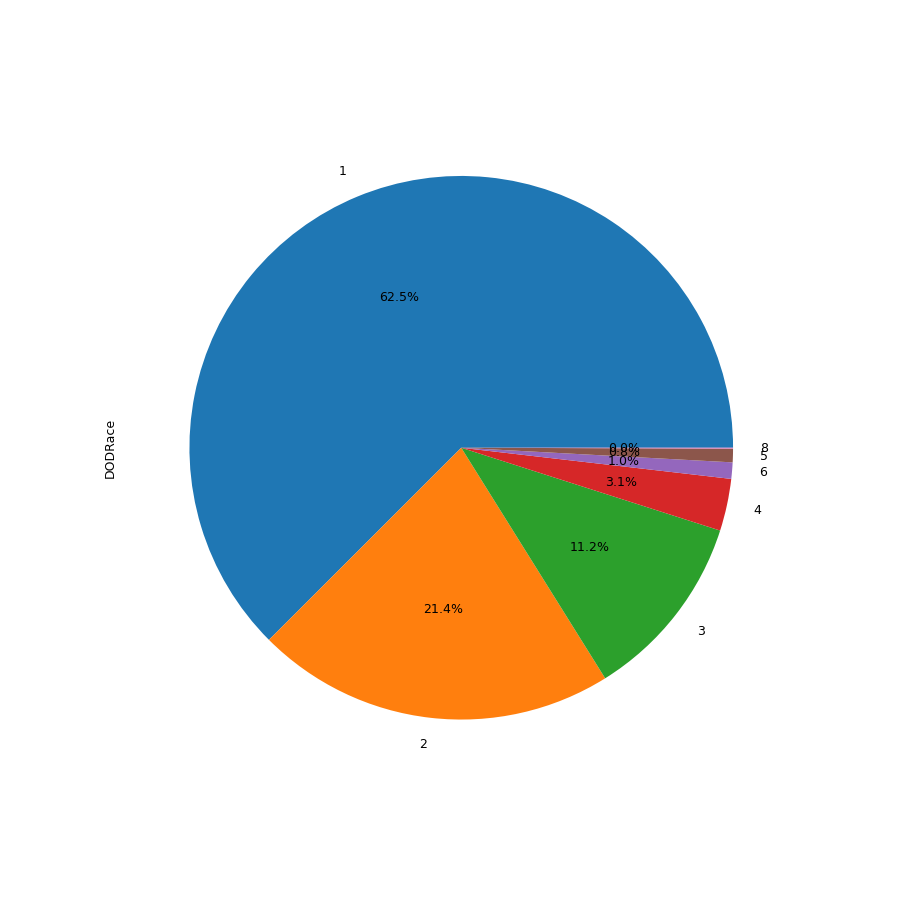

In [17]:
print(df["DODRace"].value_counts())
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [18]:
drop_list =[]
for col in df.columns:
    if df[col].isnull().sum()>1800:
        print(f"{col} = {df[col].isnull().sum()}")
        drop_list.append(col)
drop_list 

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [19]:
df.drop(drop_list, axis=1, inplace=True)

In [20]:
df.isnull().sum().any()

False

In [21]:
df.shape

(6068, 106)

In [22]:
# to find how many unique values object features have
for col in df.select_dtypes(exclude=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value") 

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [23]:
df.groupby(["Component"])["DODRace"].value_counts()

Component            DODRace
Army National Guard  1          1855
                     2           499
                     3           253
                     4            60
                     5            24
                     6            17
Army Reserve         1           114
                     2            52
                     3            41
                     4             9
                     6             3
                     5             1
Regular Army         1          1823
                     2           747
                     3           385
                     4           119
                     6            39
                     5            24
                     8             3
Name: DODRace, dtype: int64

In [24]:
df.groupby(["Component","Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace
Army National Guard  Combat Arms             1          623
                                             2           79
                                             3           74
                                             4           18
                                             5            9
                                             6            4
                     Combat Service Support  1          917
                                             2          312
                                             3          142
                                             4           33
                                             6           11
                                             5           10
                     Combat Support          1          315
                                             2          108
                                             3           37
                                             4 

In [25]:
drop_list1 = ["Date", "Installation", "Component","PrimaryMOS"]

df.drop(drop_list1, axis=1, inplace=True)

In [26]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'wristheight', 'Gender', 'Branch', 'SubjectsBirthLocation',
       'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=102)

In [27]:
df.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
18         18
5          18
25         14
351        10
38          9
35          8
62          8
64          8
63          7
42          7
231         6
43          5
235         4
218         3
651         2
423         2
451         2
431         2
318         2
2351        2
641         2
2518        2
631         1
238         1
358         1
425         1
4251        1
428         1
48          1
42351       1
Name: SubjectNumericRace, dtype: int64

In [28]:
df.drop("SubjectNumericRace", axis=1, inplace=True)

In [29]:
df["DODRace"].unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [30]:
df["DODRace"] = df["DODRace"].map({1 : "White", 2 : "Black", 3 : "Hispanic", 4 : "Asian", 5 : "Native American", 6 : "Pacific Islander", 8 : "Other"})

In [31]:
df["DODRace"].value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [32]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") | (df["DODRace"] == "Hispanic")]
df

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Combat Support,New York,White,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,Combat Support,New York,Black,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Combat Service Support,Wisconsin,White,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,Combat Service Support,North Carolina,Black,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Columns: 101 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(96), object(5)
memory usage: 4.5+ MB


In [34]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067],
           dtype='int64', length=5769)

In [35]:
df.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Combat Support,New York,White,35,68,160,Left hand


In [36]:
df.reset_index(drop=True, inplace=True)

In [37]:
df.head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Branch,SubjectsBirthLocation,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,Combat Arms,North Dakota,White,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,Combat Support,New York,White,35,68,160,Left hand


In [38]:
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.000,247.254,37.458,155.000,220.000,243.000,272.000,451.000
acromialheight,5769.000,1408.630,78.303,1146.000,1353.000,1412.000,1464.000,1683.000
acromionradialelength,5769.000,328.072,20.445,249.000,314.000,328.000,342.000,393.000
anklecircumference,5769.000,225.202,15.966,156.000,214.000,225.000,235.000,293.000
axillaheight,5769.000,1301.903,71.261,1062.000,1252.000,1304.000,1351.000,1553.000
balloffootcircumference,5769.000,244.408,16.804,186.000,233.000,245.000,256.000,306.000
balloffootlength,5769.000,195.119,13.379,151.000,186.000,196.000,205.000,245.000
biacromialbreadth,5769.000,399.706,30.124,283.000,377.000,404.000,422.000,489.000
bicepscircumferenceflexed,5769.000,341.663,41.271,216.000,312.000,342.000,370.000,490.000
bicristalbreadth,5769.000,274.903,19.240,197.000,262.000,274.000,288.000,362.000


In [40]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].min() == 0:
        print(col)

Weightlbs


In [41]:
df["Weightlbs"].argmin()

824

In [42]:
df.drop(index = df["Weightlbs"].argmin(), inplace=True)

In [43]:
df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>


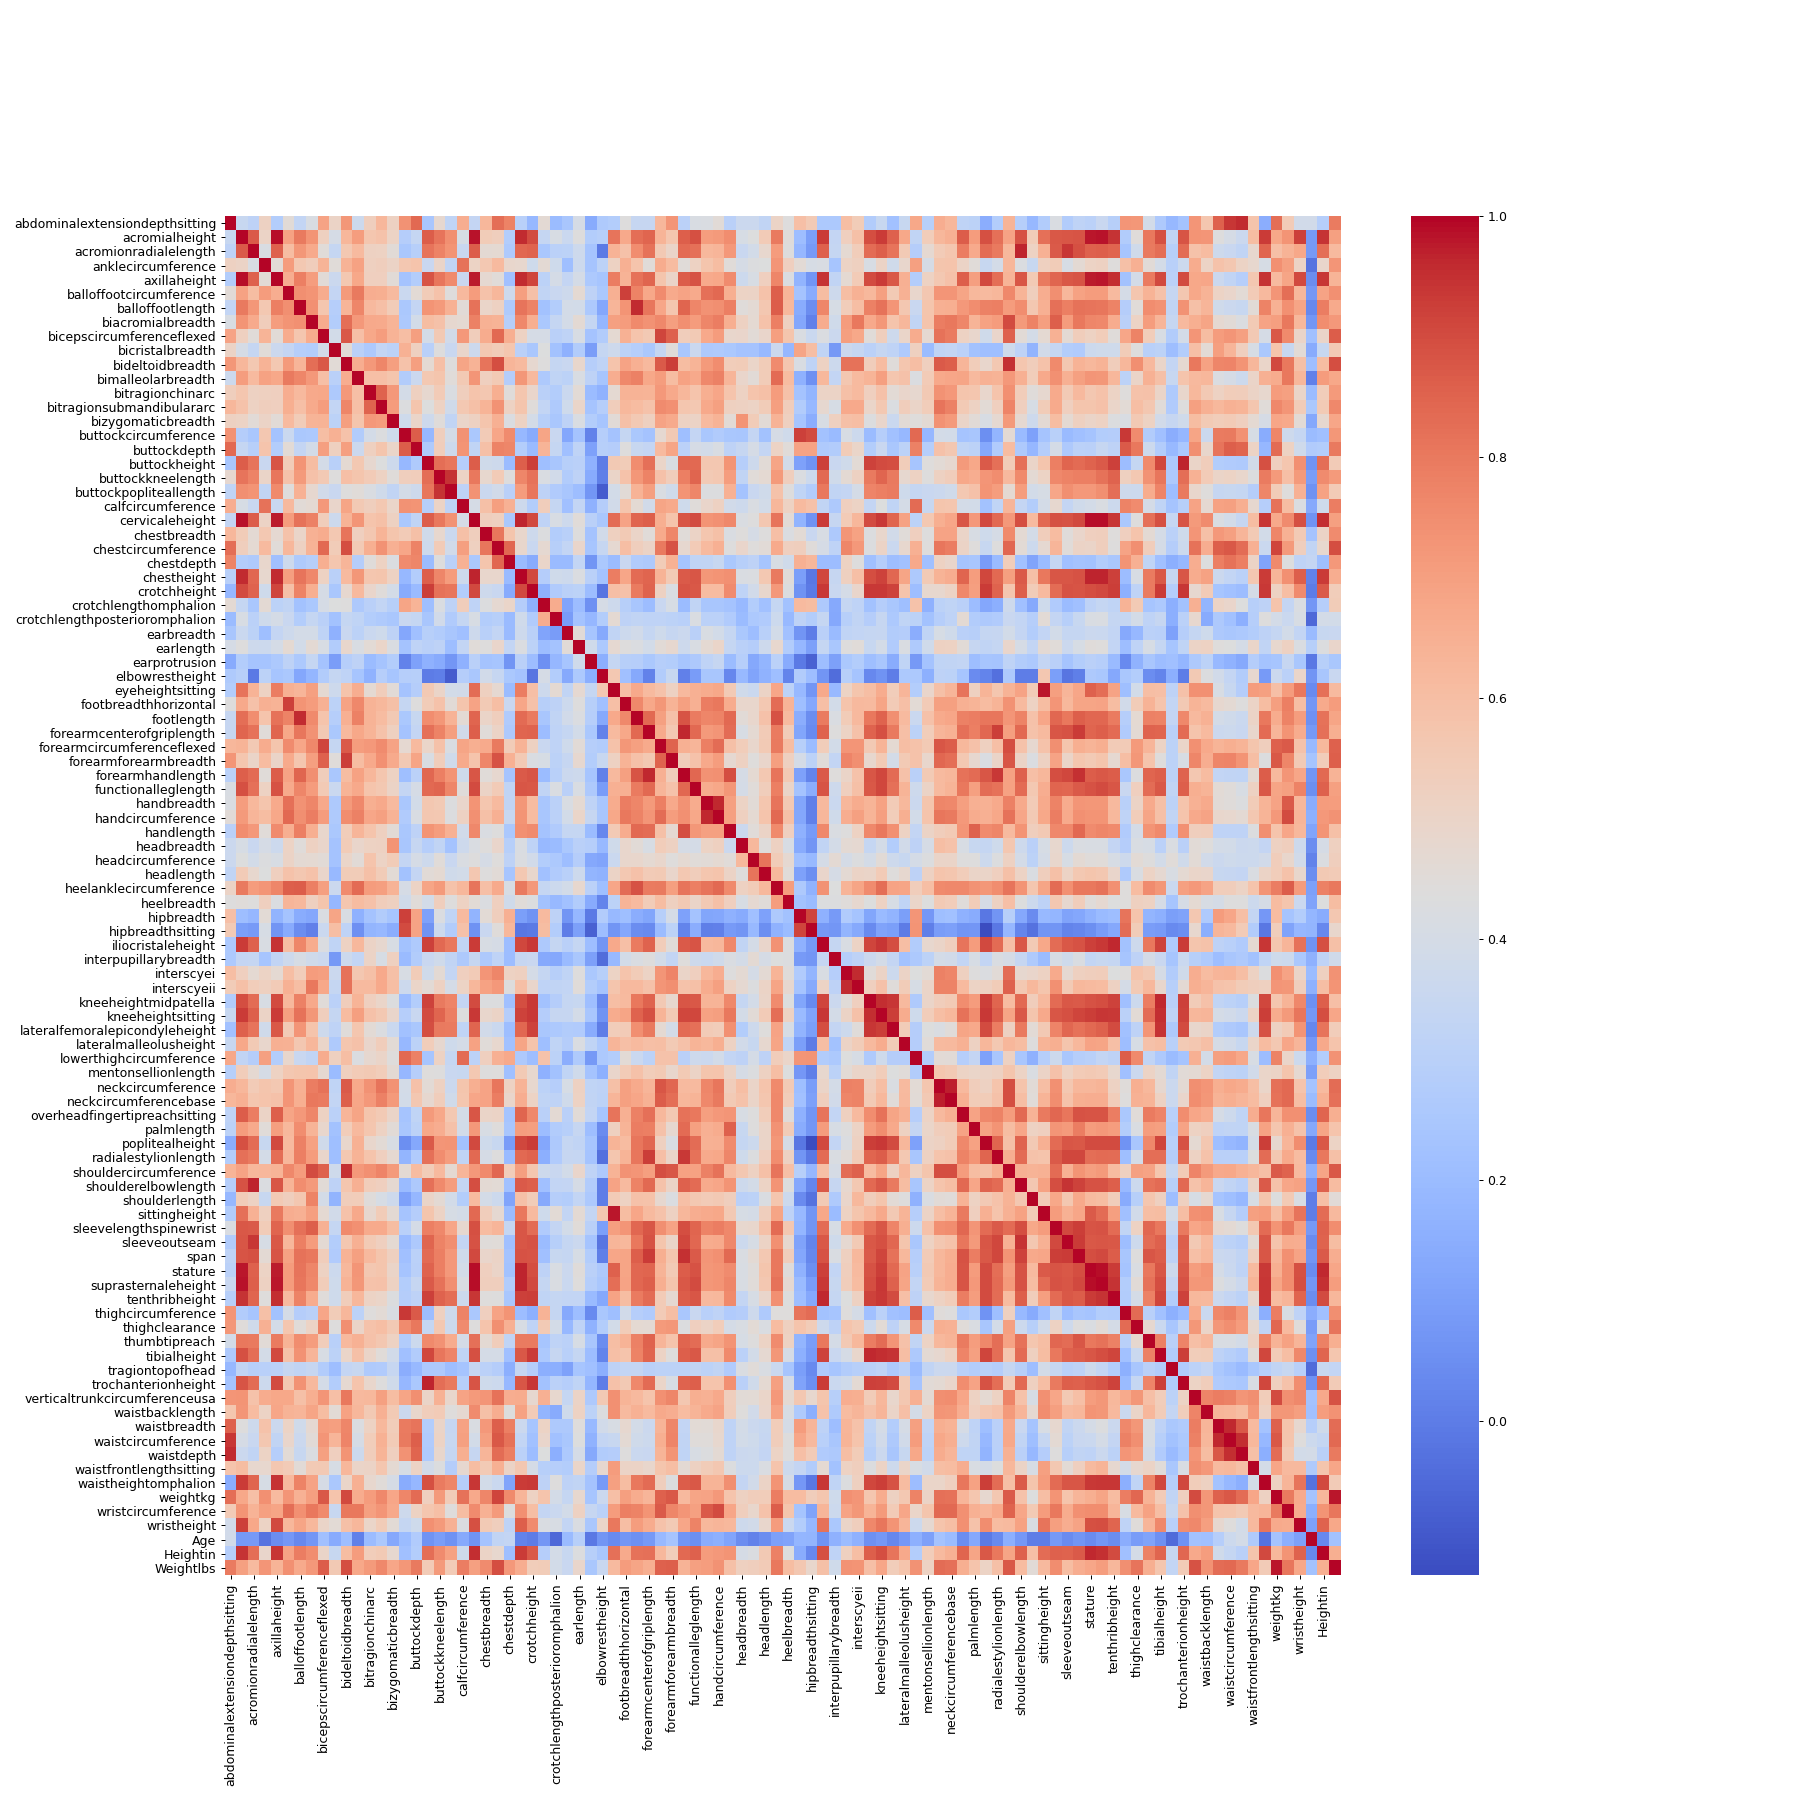

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap ="coolwarm");

In [45]:
df_temp = df.corr()

count = "done"
feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .9 and df_temp[col][i] < 1) or (df_temp[col][i]< -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                # print(f"multicolinearity alert in between {col} - {i}")
print("Number of strong corelated features:", count) 

Number of strong corelated features: done


In [46]:
df.corr().head(2)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs
abdominalextensiondepthsitting,1.000,0.352,0.313,0.519,0.281,0.457,0.333,0.418,0.691,0.506,0.725,0.366,0.531,0.626,0.520,0.739,0.841,0.246,0.476,0.324,0.659,0.337,0.628,0.826,0.778,0.296,0.189,0.463,0.200,0.242,0.404,0.140,0.264,0.280,0.439,0.345,0.346,0.628,0.729,0.306,0.415,0.419,0.457,0.301,0.362,0.363,0.329,0.503,0.437,0.595,0.555,0.256,0.259,0.599,0.542,0.275,0.349,0.221,0.348,0.674,0.294,0.657,0.627,0.321,0.311,0.150,0.280,0.638,0.287,0.188,0.274,0.423,0.277,0.318,0.308,0.353,0.293,0.730,0.725,0.389,0.261,0.186,0.231,0.729,0.572,0.859,0.940,0.959,0.579,0.147,0.825,0.547,0.383,0.386,0.290,0.794
acromialheight,0.352,1.000,0.868,0.505,0.987,0.694,0.798,0.733,0.523,0.402,0.628,0.705,0.570,0.584,0.507,0.283,0.342,0.867,0.811,0.747,0.409,0.984,0.543,0.531,0.281,0.959,0.899,0.342,0.411,0.359,0.440,0.278,0.292,0.814,0.672,0.827,0.847,0.635,0.572,0.863,0.894,0.708,0.717,0.753,0.407,0.432,0.548,0.797,0.448,0.208,0.100,0.932,0.338,0.526,0.592,0.896,0.932,0.857,0.678,0.327,0.540,0.628,0.652,0.867,0.709,0.893,0.822,0.690,0.889,0.542,0.821,0.872,0.880,0.884,0.980,0.985,0.945,0.277,0.445,0.804,0.891,0.327,0.884,0.734,0.728,0.439,0.405,0.362,0.607,0.931,0.678,0.734,0.921,0.083,0.944,0.698


In [47]:
len(df_temp.columns)

96

In [48]:
len(feature)

302

In [49]:
len(collinear)

302

In [50]:
feature==collinear

False

In [51]:
feature

['abdominalextensiondepthsitting',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromialheight',
 'acromionradialelength',
 'acromionradialelength',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bideltoidbreadth',
 'bideltoidbreadth',
 'bideltoidbreadth',
 'buttockcircumference',
 'buttockcircumference',
 'buttockheight',
 'buttockheight',
 'buttockheight',
 'buttockheight',
 'buttockheight',
 'buttockheight',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'cervicaleheight',
 'cer

In [52]:
collinear

['waistcircumference',
 'waistdepth',
 'axillaheight',
 'cervicaleheight',
 'chestheight',
 'iliocristaleheight',
 'kneeheightsitting',
 'stature',
 'suprasternaleheight',
 'tenthribheight',
 'waistheightomphalion',
 'wristheight',
 'Heightin',
 'shoulderelbowlength',
 'sleeveoutseam',
 'acromialheight',
 'cervicaleheight',
 'chestheight',
 'crotchheight',
 'iliocristaleheight',
 'kneeheightmidpatella',
 'kneeheightsitting',
 'poplitealheight',
 'stature',
 'suprasternaleheight',
 'tenthribheight',
 'tibialheight',
 'waistheightomphalion',
 'wristheight',
 'Heightin',
 'footbreadthhorizontal',
 'footlength',
 'shouldercircumference',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'shouldercircumference',
 'weightkg',
 'hipbreadth',
 'thighcircumference',
 'crotchheight',
 'iliocristaleheight',
 'kneeheightmidpatella',
 'kneeheightsitting',
 'tenthribheight',
 'tibialheight',
 'trochanterionheight',
 'buttockpopliteallength',
 'buttockkneelength',
 'acromialheight',
 'axillah

In [53]:
df_fetaure = pd.DataFrame({'feature':feature,'collinear':collinear})

In [54]:
df_fetaure

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
5,acromialheight,iliocristaleheight
6,acromialheight,kneeheightsitting
7,acromialheight,stature
8,acromialheight,suprasternaleheight
9,acromialheight,tenthribheight


In [55]:
df_temp['abdominalextensiondepthsitting']['abdominalextensiondepthsitting']

1.0

In [56]:
df_temp['abdominalextensiondepthsitting']['abdominalextensiondepthsitting']

1.0

In [57]:
df_temp.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [58]:
df_temp.index

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [59]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [60]:
df_col = pd.DataFrame([feature, collinear], index=["feature","collinear"]).T
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
5,acromialheight,iliocristaleheight
6,acromialheight,kneeheightsitting
7,acromialheight,stature
8,acromialheight,suprasternaleheight
9,acromialheight,tenthribheight


In [61]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
cervicaleheight                   15
tenthribheight                    15
waistheightomphalion              15
axillaheight                      15
iliocristaleheight                15
crotchheight                      14
suprasternaleheight               13
chestheight                       12
kneeheightmidpatella              12
acromialheight                    11
tibialheight                      11
stature                           10
poplitealheight                   10
trochanterionheight                9
span                               9
Heightin                           7
buttockheight                      7
lateralfemoralepicondyleheight     7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
weightkg                           4
functionalleglength                3
bideltoidbreadth                   3
forearmcenterofgriplength          3
shoulderelbowlength           

# DATA Preprocessing

In [62]:
X = df.drop("DODRace", axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = df.DODRace

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6, stratify =y)

In [64]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelling

In [187]:
# General Insights Without Scaling
def models(X_train, y_train):
    # Logistic Regression
    log = LogisticRegression(random_state=42)
    log.fit(X_train, y_train)
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
    decision_tree.fit(X_train, y_train)
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=42)
    random_forest.fit(X_train, y_train)
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train)
    # SVC
    svc = SVC(class_weight="balanced")
    svc.fit(X_train, y_train)
    # XGB
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    # AdaBoosting
    ab = AdaBoostClassifier(n_estimators=50, random_state=42)
    ab.fit(X_train, y_train)
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=42)
    gb.fit(X_train, y_train)
    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(f"\033[1m2) SVC Training Accuracy:\033[0m {svc.score(X_train, y_train)}")
    print(f"\033[1m3) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(f"\033[1m4) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(f"\033[1m5) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")
    print(f"\033[1m6) GradiendBoosting Training Accuracy:\033[0m {gb.score(X_train, y_train)}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab.score(X_train, y_train)}")
    print(f"\033[1m8) XGBoosting Training Accuracy:\033[0m {xgb.score(X_train, y_train)}")
    return log, svc, decision_tree, random_forest, knn, gb, ab, xgb

In [188]:
models(X_train_scaled, y_train)

[10:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<IPython.core.display.Javascript object>

1) Logistic Regression Training Accuracy: 0.9146077156480278
2) SVC Training Accuracy: 0.858690940615518
3) Decision Tree Training Accuracy: 1.0
4) Random Forest Training Accuracy: 0.9934980494148244
5) KNN Training Accuracy: 0.8599913307325531
6) GradiendBoosting Training Accuracy: 0.9224100563502384
7) AdaBoosting Training Accuracy: 0.8558734286952753
8) XGBoosting Training Accuracy: 1.0


(LogisticRegression(random_state=42),
 SVC(class_weight='balanced'),
 DecisionTreeClassifier(criterion='entropy', random_state=42),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42),
 KNeighborsClassifier(n_neighbors=3),
 GradientBoostingClassifier(random_state=42),
 AdaBoostClassifier(random_state=42),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1,
               objective='multi:softprob', random_state=42, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None))

## 1. Logistic model

In [ ]:
log_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=6)

log_model.fit(X_train_scaled, y_train)

y_test_pred= log_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_pred))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(log_model, X_test_scaled, y_test, values_format='.0f')

In [ ]:
y_train_pred = log_model.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_train, y_train_pred))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(log_model, X_train_scaled, y_train);

In [193]:
f1score = make_scorer(f1_score, average="weighted")

In [210]:
## Cross Validation 
cv_model = LogisticRegression(max_iter=10000, random_state=6)
scores = cross_validate(cv_model, X_train_scaled, y_train, n_jobs = -1, scoring = recall, cv = 10)
# scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc']
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score   0.894
dtype: float64

In [208]:
model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=6)
scores = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring = recall, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" f1score : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()

[0.8656, 0.8698, 0.8635, 0.874, 0.8708] 

 f1score : %86.87, std : %0.374 

0   0.869
dtype: float64


In [195]:
scores 

array([0.86560072, 0.86978435, 0.86351002, 0.87398284, 0.87080788])

In [211]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels=["Hispanic"] )
f1_Hispanic

make_scorer(f1_score, average=None, labels=['Hispanic'])

In [212]:
param_grid = { "class_weight" : ["balanced", None],
              'penalty': ["l1","l2"],
              'solver' : ['saga','lbfgs'],
              }

In [214]:
model = LogisticRegression(max_iter=10000, random_state=6)
log_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True, n_jobs=-1)

In [215]:
log_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=LogisticRegression(max_iter=10000, random_state=6),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['saga', 'lbfgs']},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [216]:
log_model_grid.best_params_

{'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}

[[234   3  23]
 [  8  73  54]
 [  7  15 737]]
--------------------------------------------------------
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.80      0.54      0.65       135
       White       0.91      0.97      0.94       759

    accuracy                           0.90      1154
   macro avg       0.88      0.80      0.83      1154
weighted avg       0.90      0.90      0.90      1154

--------------------------------------------------------


<IPython.core.display.Javascript object>


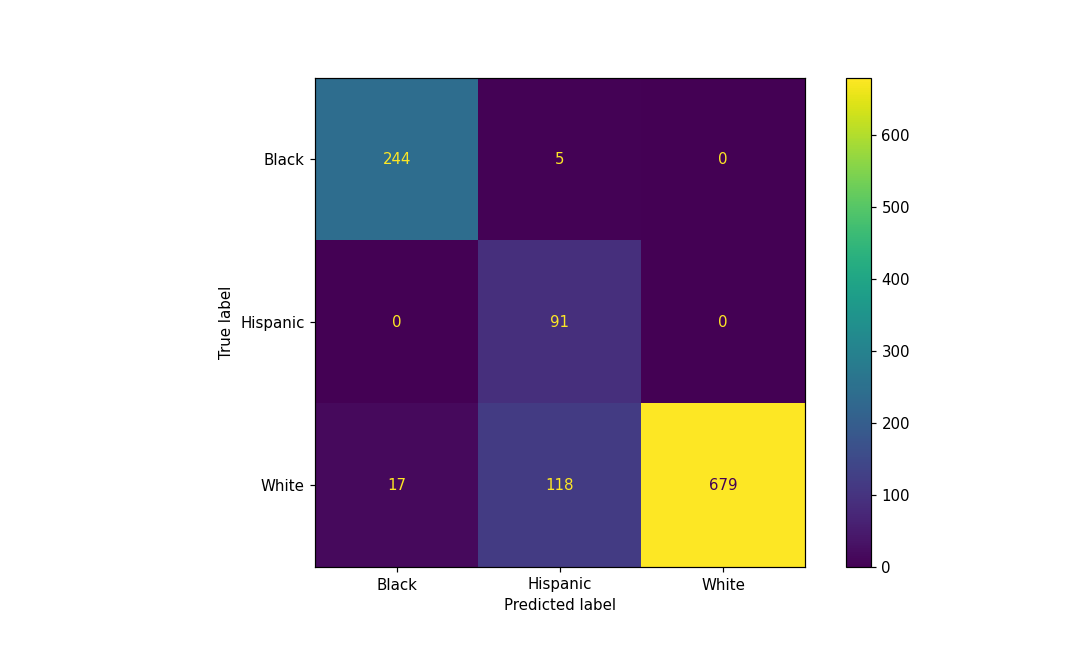

In [267]:
y_test_pred= log_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print("\033[1m--------------------------------------------------------\033[0m")
print(classification_report(y_test, y_test_pred))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(log_model, X_test_scaled, y_test_pred, values_format='.0f')

In [241]:
len(X_test_scaled)

1154

In [242]:
len(y_score)

1154

In [244]:
len(y_test)

1154

In [248]:
y_test.value_counts()

White       759
Black       260
Hispanic    135
Name: DODRace, dtype: int64

In [243]:
y_score

array([[ 1.36076366, -1.7066279 ,  0.34586424],
       [ 3.34715301, -2.36784628, -0.97930673],
       [-2.86774984,  1.50557644,  1.3621734 ],
       ...,
       [-3.43011342,  2.76333345,  0.66677997],
       [-2.06226015, -0.61997523,  2.68223538],
       [ 0.21911449,  0.6441206 , -0.8632351 ]])

In [250]:
len(y_test_dummies)

1154

In [253]:
fpr[i]

array([0.        , 0.        , 0.        , 0.00253165, 0.00253165,
       0.00506329, 0.00506329, 0.00759494, 0.00759494, 0.01012658,
       0.01012658, 0.01265823, 0.01265823, 0.01518987, 0.01518987,
       0.01772152, 0.01772152, 0.02025316, 0.02025316, 0.02278481,
       0.02278481, 0.02531646, 0.02531646, 0.0278481 , 0.0278481 ,
       0.03037975, 0.03037975, 0.03291139, 0.03291139, 0.03544304,
       0.03544304, 0.03797468, 0.03797468, 0.04050633, 0.04050633,
       0.04303797, 0.04303797, 0.04556962, 0.04556962, 0.04810127,
       0.04810127, 0.05063291, 0.05063291, 0.0556962 , 0.0556962 ,
       0.05822785, 0.05822785, 0.06075949, 0.06075949, 0.06329114,
       0.06329114, 0.06835443, 0.06835443, 0.07088608, 0.07088608,
       0.07341772, 0.07341772, 0.07848101, 0.07848101, 0.08101266,
       0.08101266, 0.0835443 , 0.0835443 , 0.08607595, 0.08607595,
       0.08860759, 0.08860759, 0.09113924, 0.09113924, 0.09367089,
       0.09367089, 0.09620253, 0.09620253, 0.09873418, 0.09873

In [257]:
tpr[i]

array([0.        , 0.00131752, 0.08827404, 0.08827404, 0.13965744,
       0.13965744, 0.15151515, 0.15151515, 0.18181818, 0.18181818,
       0.30566535, 0.30566535, 0.33333333, 0.33333333, 0.38998682,
       0.38998682, 0.39657444, 0.39657444, 0.46245059, 0.46245059,
       0.4743083 , 0.4743083 , 0.52700922, 0.52700922, 0.53227931,
       0.53227931, 0.60079051, 0.60079051, 0.6113307 , 0.6113307 ,
       0.61923584, 0.61923584, 0.64163373, 0.64163373, 0.64690382,
       0.64690382, 0.66798419, 0.66798419, 0.70092227, 0.70092227,
       0.70619236, 0.70619236, 0.71277997, 0.71277997, 0.73649539,
       0.73649539, 0.74176548, 0.74176548, 0.75098814, 0.75098814,
       0.75625823, 0.75625823, 0.76152833, 0.76152833, 0.7944664 ,
       0.7944664 , 0.80500659, 0.80500659, 0.80632411, 0.80632411,
       0.82213439, 0.82213439, 0.83926219, 0.83926219, 0.85111989,
       0.85111989, 0.85375494, 0.85375494, 0.85638999, 0.85638999,
       0.86166008, 0.86166008, 0.86429513, 0.86429513, 0.86561

In [260]:
roc_auc[1] # hispanic

0.9011376440228256

In [261]:
roc_auc[2] # white

0.9489001184103

In [263]:
roc_auc[0] # black

0.9871321631388745

In [266]:
y_test.head()

3367       Black
3821       Black
4722    Hispanic
4129       White
58         White
Name: DODRace, dtype: object

<IPython.core.display.Javascript object>


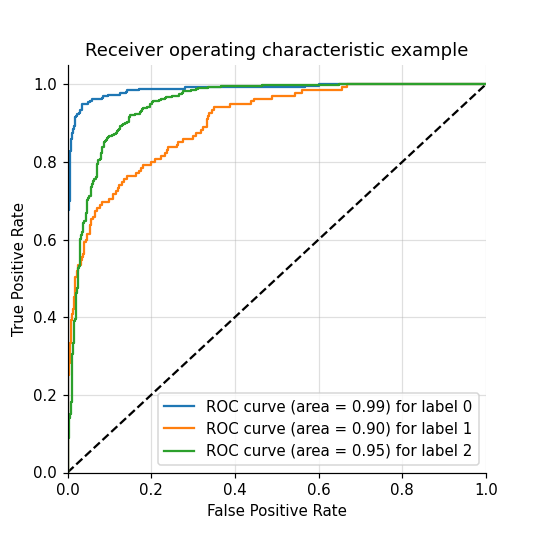

In [236]:
y_score = log_model_grid.decision_function(X_test_scaled)

# structures
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(5,5))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(3):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()

<IPython.core.display.Javascript object>


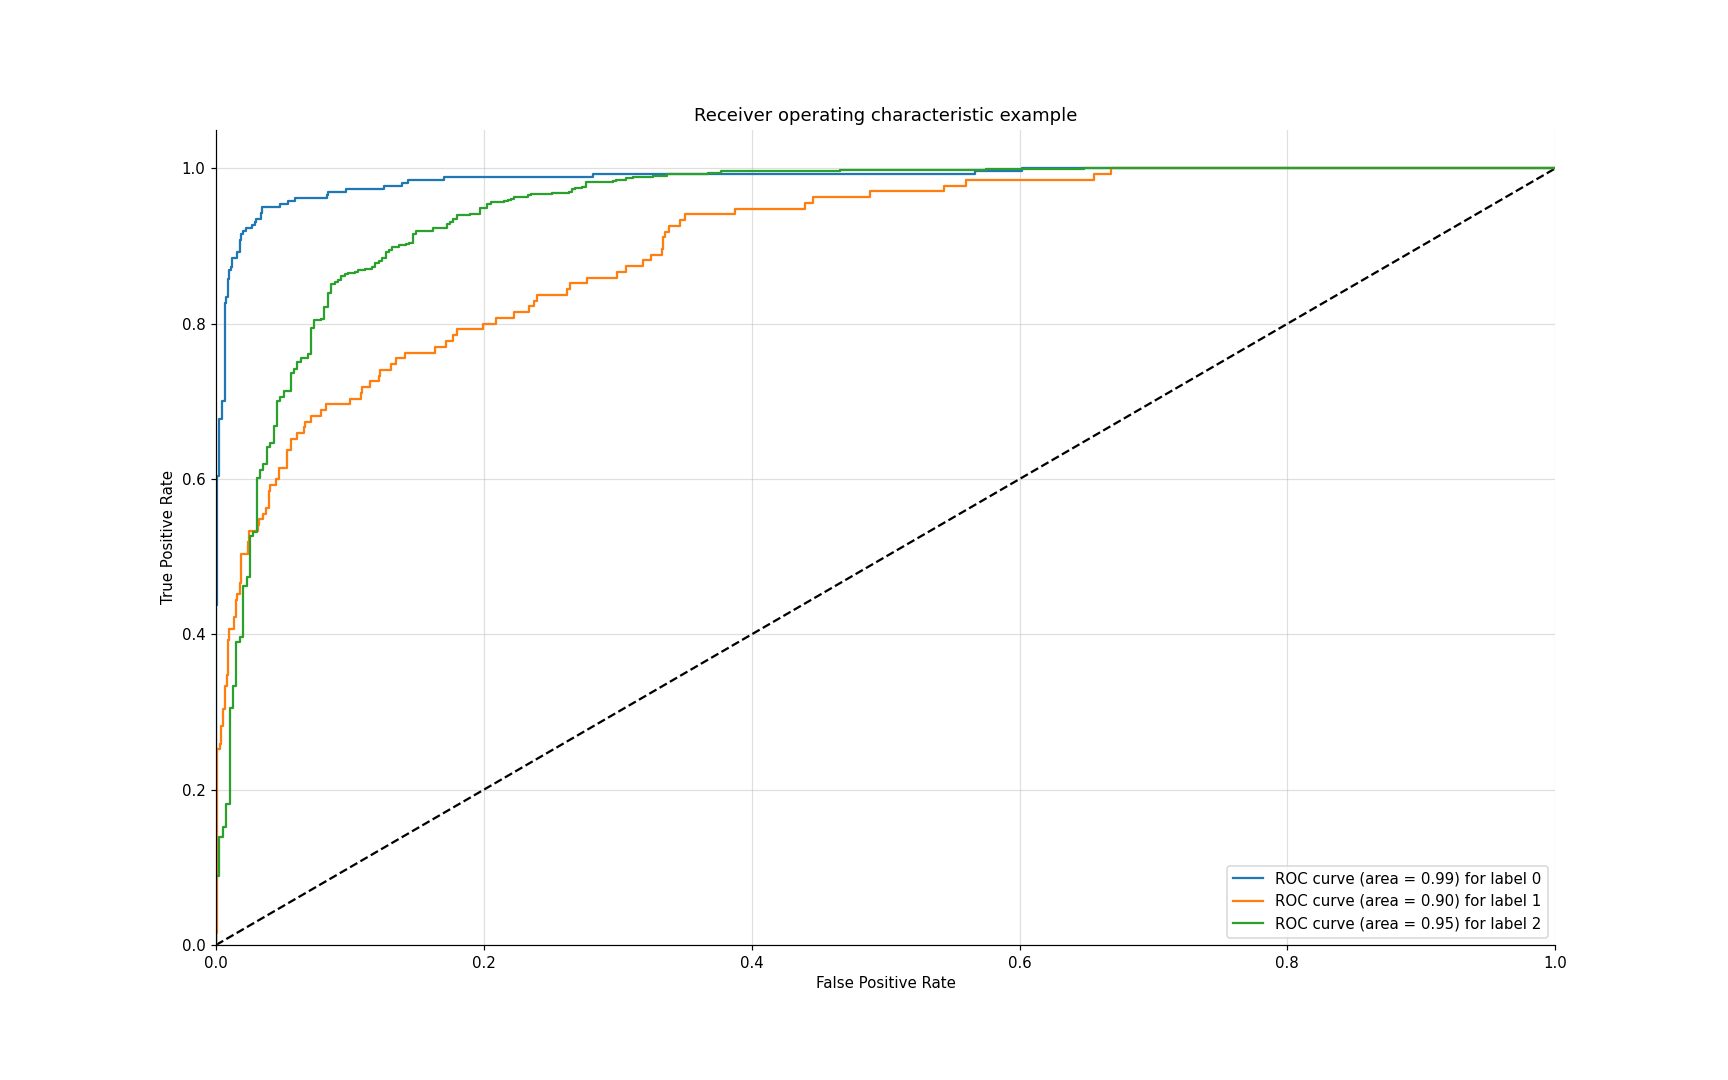

In [226]:
plot_multiclass_roc(log_model_grid, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

## 2. SVC

test scores 
--------------
[[239   9  12]
 [  8 102  25]
 [ 14 118 627]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.45      0.76      0.56       135
       White       0.94      0.83      0.88       759

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.84      0.85      1154



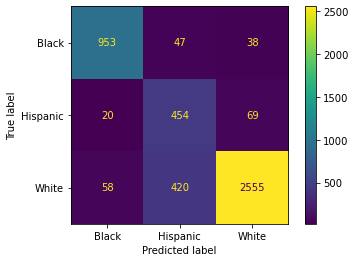

In [163]:
svm_model = SVC(class_weight="balanced")

svm_model.fit(X_train_scaled, y_train)

y_test_pred= svm_model.predict(X_test_scaled)

print("test scores","\n--------------")

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(svm_model,X_train_scaled,y_train);#x

train scores 
--------------
[[ 953   47   38]
 [  20  454   69]
 [  58  420 2555]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3033

    accuracy                           0.86      4614
   macro avg       0.79      0.87      0.81      4614
weighted avg       0.90      0.86      0.87      4614



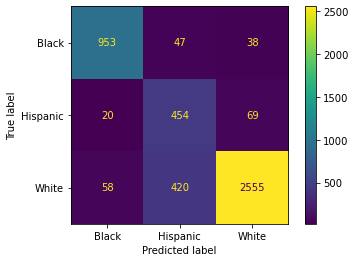

In [164]:
y_test_pred= svm_model.predict(X_train_scaled)

print("train scores","\n--------------")

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
plot_confusion_matrix(svm_model,X_train_scaled,y_train);

model = SVC('class_weight="balanced"')
scores = cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring = f1_Hispanic, n_jobs = -1)
print([round(i, 4) for i in scores], "\n")
print(f" {i:20} : %{scores.mean()*100:.2f}, std : %{scores.std()*100:.3f} \n")

In [165]:
param_grid = {'C': np.linspace(200,400,5),
              'decision_function_shape' : ['ovr','ovo'],
              'gamma': ["scale", "auto", 1,0.1,0.01],
              'kernel': ['rbf'],
              'class_weight':["balanced",None]}

<IPython.core.display.Javascript object>

In [166]:
model = SVC(class_weight="balanced")
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [167]:
svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': array([200., 250., 300., 350., 400.]),
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01],
                         'kernel': ['rbf']},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [168]:
svm_model_grid.best_params_

{'C': 400.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'rbf'}

[[239   2  19]
 [  6  78  51]
 [  8  18 733]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93       260
    Hispanic       0.80      0.58      0.67       135
       White       0.91      0.97      0.94       759

    accuracy                           0.91      1154
   macro avg       0.88      0.82      0.85      1154
weighted avg       0.91      0.91      0.91      1154



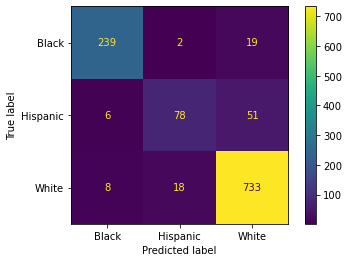

In [169]:
y_test_pred= svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(svm_model_grid,X_test_scaled,y_test);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

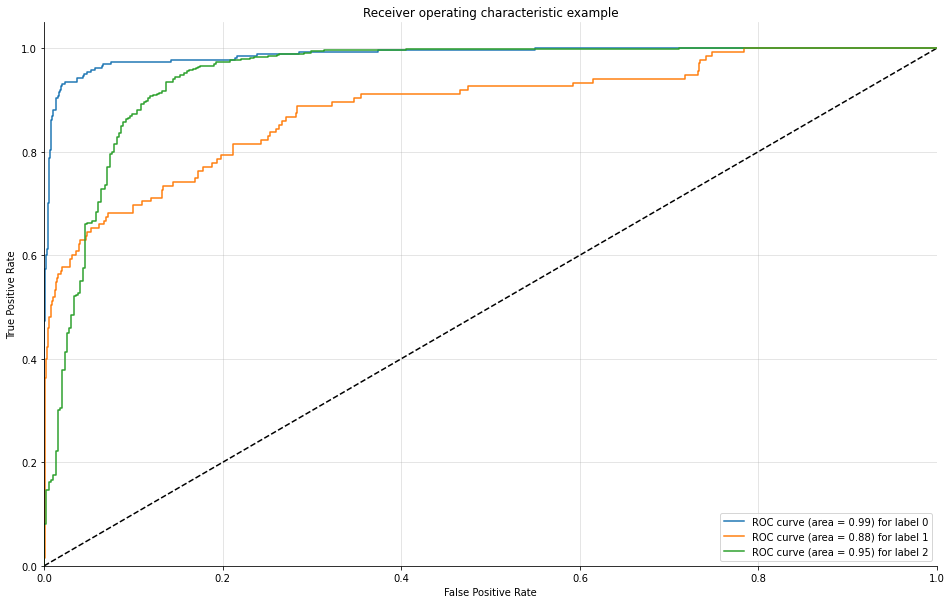

In [170]:
plot_multiclass_roc(svm_model_grid, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

## 3. RF

In [171]:
rf_mod = RandomForestClassifier()

In [172]:
rf_mod.fit(X_train_scaled,y_train)

RandomForestClassifier()

[[195   0  65]
 [ 10  14 111]
 [  9   0 750]]
              precision    recall  f1-score   support

       Black       0.91      0.75      0.82       260
    Hispanic       1.00      0.10      0.19       135
       White       0.81      0.99      0.89       759

    accuracy                           0.83      1154
   macro avg       0.91      0.61      0.63      1154
weighted avg       0.85      0.83      0.79      1154



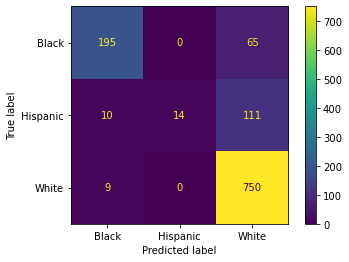

In [173]:
y_test_pred= rf_mod.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(rf_mod,X_test_scaled,y_test);#x

[[1038    0    0]
 [   0  543    0]
 [   0    0 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



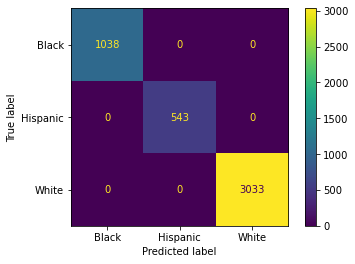

In [174]:
y_test_pred= rf_mod.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
plot_confusion_matrix(rf_mod,X_train_scaled,y_train);

In [175]:
param_grid = {'n_estimators':[400,500],
             'criterion': ["gini","entropy"],
             'max_depth':[10,12,14,16],
             'min_samples_split':[18,20,22],
             'class_weight': ['balanced',None]}

In [176]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model, param_grid, verbose=3, scoring=f1_Hispanic, refit=True,n_jobs=-1)

In [177]:
rf_grid_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [18, 20, 22],
                         'n_estimators': [400, 500]},
             scoring=make_scorer(f1_score, average=None, labels=['Hispanic']),
             verbose=3)

In [178]:
rf_grid_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 22,
 'n_estimators': 500}

[[215   6  39]
 [ 13  56  66]
 [ 32  56 671]]
              precision    recall  f1-score   support

       Black       0.83      0.83      0.83       260
    Hispanic       0.47      0.41      0.44       135
       White       0.86      0.88      0.87       759

    accuracy                           0.82      1154
   macro avg       0.72      0.71      0.71      1154
weighted avg       0.81      0.82      0.81      1154



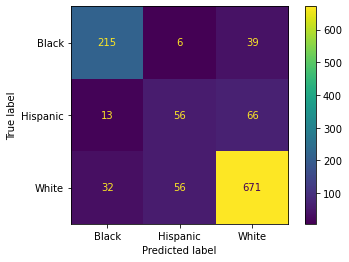

In [179]:
y_test_pred= rf_grid_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(rf_grid_model,X_test_scaled,y_test);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

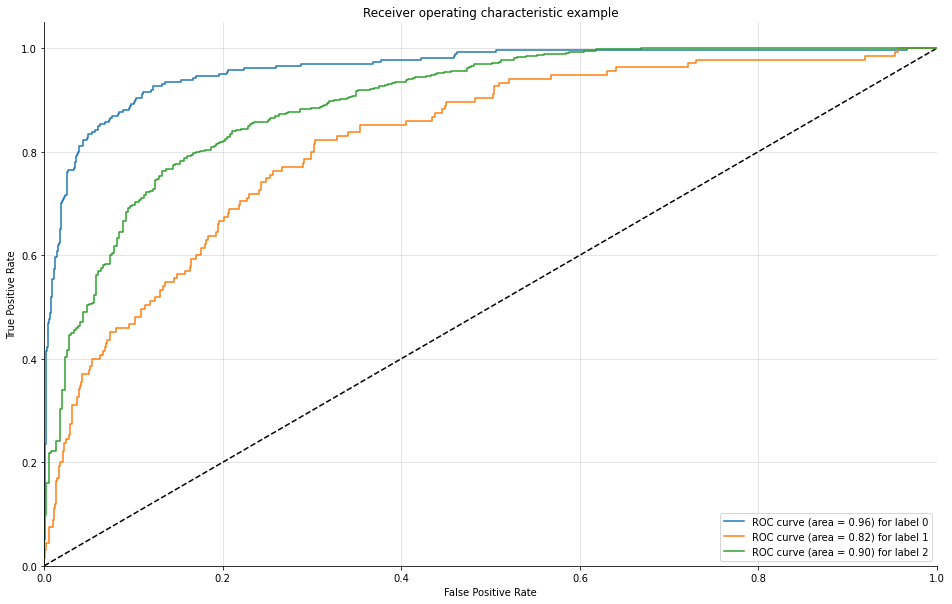

In [180]:
plot_multiclass_roc_for_tree(rf_grid_model, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

## 4. XGBoost

In [181]:
xgb_model = XGBClassifier()

In [182]:
xgb_model.fit(X_train_scaled,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[[219   0  41]
 [  9  60  66]
 [ 14  11 734]]
              precision    recall  f1-score   support

       Black       0.90      0.84      0.87       260
    Hispanic       0.85      0.44      0.58       135
       White       0.87      0.97      0.92       759

    accuracy                           0.88      1154
   macro avg       0.87      0.75      0.79      1154
weighted avg       0.88      0.88      0.87      1154



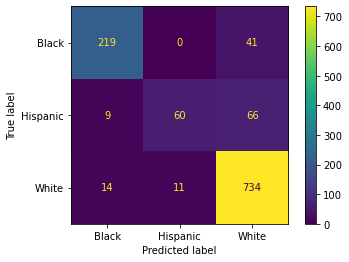

In [183]:
y_test_pred= xgb_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(xgb_model,X_test_scaled,y_test);#x

[[1038    0    0]
 [   0  543    0]
 [   0    0 3033]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3033

    accuracy                           1.00      4614
   macro avg       1.00      1.00      1.00      4614
weighted avg       1.00      1.00      1.00      4614



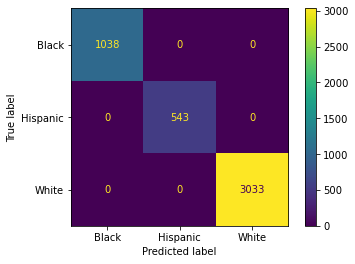

In [184]:
y_test_pred= xgb_model.predict(X_train_scaled)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
plot_confusion_matrix(xgb_model,X_train_scaled,y_train);

In [277]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50708869, 0.50708869, 0.50708869, ..., 0.50708869, 0.50708869,
       2.83241252])

    Nasıl class_weightçalıştığı için: 1 yerine class[i]ile örneklerindeki hataları cezalandırır class_weight[i]. Yani daha yüksek sınıf ağırlığı, bir sınıfa daha fazla önem vermek istediğiniz anlamına gelir. Söylediğinize göre, sınıf 0, sınıf 1'den 19 kat daha sık görünüyor. Dolayısıyla class_weight, sınıf 1'in sınıf 0'a göre artırılması gerekir , örneğin {0: .1, 1: .9}. Eğer class_weight1'e toplamı bir yapmıyor, temelde düzenlilestirme parametreyi değiştirecek.


In [272]:
len(y_train)

4614

In [270]:
len(classes_weights )

4614

In [275]:
comp

,0,label
0,0.507,White
1,0.507,White
2,0.507,White
3,1.482,Black
4,1.482,Black
...,...,...
4609,0.507,White
4610,0.507,White
4611,0.507,White
4612,0.507,White


In [274]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0    
Black     1.482    1038
Hispanic  2.832     543
White     0.507    3033
Name: 0, dtype: int64

In [185]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [186]:
xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [187]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

[[222   0  38]
 [  9  63  63]
 [ 11  16 732]]
              precision    recall  f1-score   support

       Black       0.92      0.85      0.88       260
    Hispanic       0.80      0.47      0.59       135
       White       0.88      0.96      0.92       759

    accuracy                           0.88      1154
   macro avg       0.86      0.76      0.80      1154
weighted avg       0.88      0.88      0.87      1154



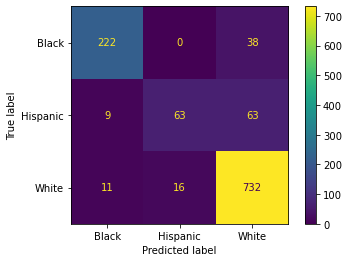

In [188]:
y_test_pred= xgb_grid_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(xgb_grid_model,X_test_scaled,y_test);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

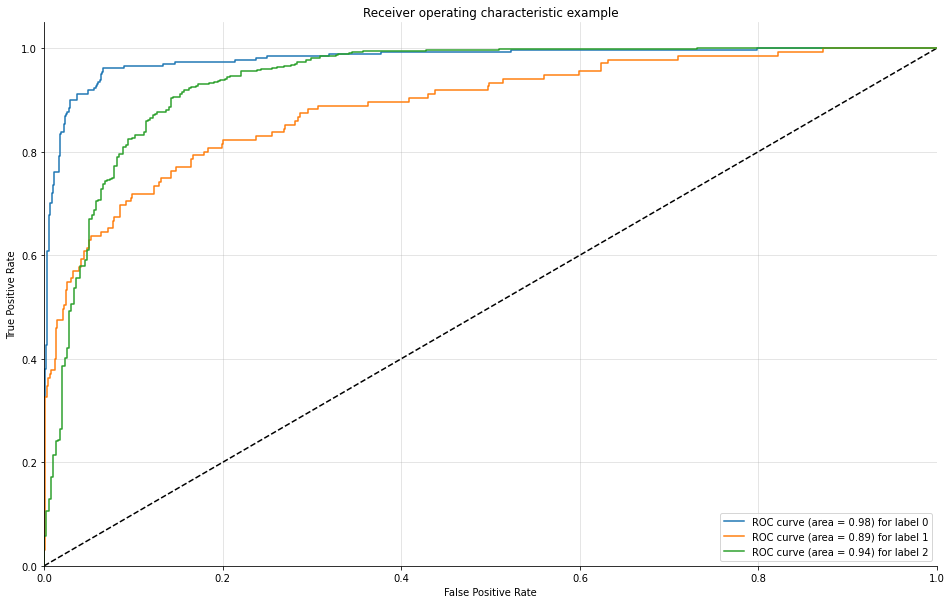

In [189]:
plot_multiclass_roc_for_tree(xgb_grid_model, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

---
---

## Prediction

In [282]:
X.head(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,...,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_New Zealand,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthL

In [284]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,...,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_New Zealand,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthL

In [335]:
random_sample1 = pd.DataFrame(X.describe().loc["mean"])
random_sample1.T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,...,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_New Zealand,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthL

In [293]:
random_sample2 = pd.DataFrame(X.describe().loc["min"])
random_sample2

,min
abdominalextensiondepthsitting,155.000
acromialheight,1146.000
acromionradialelength,249.000
anklecircumference,156.000
axillaheight,1062.000
balloffootcircumference,186.000
balloffootlength,151.000
biacromialbreadth,283.000
bicepscircumferenceflexed,216.000
bicristalbreadth,197.000


In [296]:
a = pd.DataFrame(X.iloc[200]).T  # x
a

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,...,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_New Zealand,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthL

In [297]:
a = pd.get_dummies(a)

In [ ]:
X_scaled = scaler.fit_transform(X)

In [342]:
random_sample1 = random_sample1.T.reset_index(drop=True)

In [344]:
random_sample1

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,...,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_New Zealand,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthL

In [349]:
a = scaler.transform(a)

random_sample1 = scaler.transform(random_sample1)

X_scaled = scaler.fit_transform(X)

{'C': 400.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'rbf'}

In [346]:
random_sample1

array([[3.11673562e-01, 4.89052165e-01, 5.49107143e-01, 5.05116323e-01,
        4.88588631e-01, 4.86728502e-01, 4.69339275e-01, 5.66518657e-01,
        4.58584741e-01, 4.72143067e-01, 4.80160244e-01, 4.81526429e-01,
        4.91178683e-01, 4.25352719e-01, 4.70599861e-01, 4.71945582e-01,
        4.10124252e-01, 5.09694018e-01, 5.11475496e-01, 5.25916936e-01,
        4.68155178e-01, 5.13100908e-01, 4.68198104e-01, 4.25321295e-01,
        3.86496161e-01, 5.02532372e-01, 5.15677866e-01, 4.59156399e-01,
        4.83897365e-01, 4.84512252e-01, 4.74430355e-01, 4.39419457e-01,
        4.95402755e-01, 5.13153297e-01, 4.47228198e-01, 4.73543382e-01,
        5.15548465e-01, 4.73546436e-01, 4.40506379e-01, 5.42655824e-01,
        5.59976399e-01, 4.76248266e-01, 5.02439005e-01, 4.44659805e-01,
        4.57463969e-01, 5.14436664e-01, 5.02433268e-01, 5.19134105e-01,
        5.07439513e-01, 4.06357631e-01, 4.07723150e-01, 5.17498104e-01,
        4.71279873e-01, 4.88947642e-01, 4.68694822e-01, 4.912128

In [298]:
a

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,...,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_New Zealand,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthL

In [303]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235
0,0.375,0.598,0.611,0.482,0.580,0.558,0.543,0.573,0.558,0.467,0.486,0.444,0.441,0.317,0.520,0.401,0.398,0.533,0.545,0.573,0.416,0.617,0.520,0.490,0.418,0.577,0.634,0.411,0.480,0.524,0.714,0.286,0.527,0.574,0.490,0.558,0.576,0.490,0.495,0.582,0.626,0.605,0.614,0.483,0.413,0.609,0.667,0.469,0.489,0.325,0.330,0.584,0.673,0.521,0.498,0.586,0.591,0.612,0.680,0.326,0.415,0.523,0.551,0.622,0.438,0.600,0.654,0.533,0.638,0.487,0.616,0.585,0.635,0.575,0.606,0.598,0.506,0.432,0.312,0.465,0.608,0.778,0.595,0.552,0.617,0.472,0.419,0.381,0.737,0.563,0.422,0.554,0.514,0.585,0.395,0.400,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,0.264,0.464,0.535,0.467,0.470,0.492,0.447,0.539,0.445,0.364,0.436,0.333,0.653,0.517,0.380,0.343,0.354,0.505,0.409,0.391,0.354,0.496,0.373,0.421,0.390,0.482,0.572,0.436,0.591,0.381,0.457,0.238,0.454,0.492,0.429,0.469,0.570,0.441,0.366,0.578,0.543,0.500,0.489,0.506,0.326,0.496,0.579,0.524,0.533,0.230,0.291,0.526,0.423,0.586,0.520,0.541,0.514,0.562,0.600,0.261,0.615,0.439,0.486,0.498,0.542,0.509,0.535,0.476,0.539,0.436,0.464,0.550,0.515,0.529,0.472,0.474,0.469,0.349,0.348,0.556,0.544,0.333,0.593,0.439,0.344,0.420,0.337,0.325,0.400,0.563,0.339,0.467,0.396,0.439,0.316,0.315,1.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,0.446,0.529,0.639,0.540,0.540,0.583,0.479,0.699,0.701,0.388,0.668,0.556,0.661,0.586,0.380,0.525,0.497,0.578,0.560,0.560,0.568,0.553,0.500,0.549,0.455,0.569,0.580,0.500,0.516,0.714,0.429,0.476,0.478,0.605,0.531,0.531,0.614,0.777,0.495,0.642,0.582,0.684,0.682,0.596,0.370,0.534,0.596,0.676,0.489,0.407,0.433,0.542,0.596,0.658,0.624,0.564,0.575,0.537,0.580,0.384,0.492,0.536,0.543,0.622,0.604,0.573,0.623,0.756,0.632,0.769,0.578,0.649,0.649,0.682,0.532,0.576,0.536,0.596,0.558,0.518,0.549,0.444,0.593,0.518,0.502,0.472,0.460,0.437,0.595,0.533,0.527,0.609,0.445,0.610,0.316,0.506,1.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000

In [313]:
final_model = SVC(C=400, class_weight=None, decision_function_shape="ovr", gamma="auto", kernel="rbf").fit(X_scaled,y)

In [195]:
final_model.predict(X.describe().loc["mean"].values.reshape(1,-1))

array(['Black'], dtype=object)

In [347]:
final_model.predict(random_sample1)

array(['White'], dtype=object)

In [318]:
X.describe().loc["mean"].T

abdominalextensiondepthsitting                  247.255
acromialheight                                 1408.621
acromionradialelength                           328.071
anklecircumference                              225.201
axillaheight                                   1301.897
balloffootcircumference                         244.407
balloffootlength                                195.118
biacromialbreadth                               399.703
bicepscircumferenceflexed                       341.652
bicristalbreadth                                274.904
bideltoidbreadth                                491.445
bimalleolarbreadth                               72.335
bitragionchinarc                                324.959
bitragionsubmandibulararc                       306.676
bizygomaticbreadth                              139.530
buttockcircumference                           1022.055
buttockdepth                                    242.232
buttockheight                                   

In [317]:
X.describe().loc["mean"].values

array([2.47255374e+02, 1.40862101e+03, 3.28071429e+02, 2.25200936e+02,
       1.30189702e+03, 2.44407420e+02, 1.95117892e+02, 3.99702843e+02,
       3.41652219e+02, 2.74903606e+02, 4.91444868e+02, 7.23349515e+01,
       3.24959085e+02, 3.06676144e+02, 1.39529993e+02, 1.02205513e+03,
       2.42232490e+02, 8.72110264e+02, 6.10449202e+02, 4.98331311e+02,
       3.86315881e+02, 1.47994348e+03, 2.83229716e+02, 1.02419868e+03,
       2.52323682e+02, 1.25428138e+03, 8.27100381e+02, 6.22684986e+02,
       3.51876907e+02, 3.51747573e+01, 6.26050624e+01, 2.22278086e+01,
       2.40548370e+02, 7.86393551e+02, 9.89141817e+01, 2.63510402e+02,
       3.39456657e+02, 2.95656380e+02, 5.53083564e+02, 4.67896151e+02,
       1.10434865e+03, 8.50974341e+01, 2.04214632e+02, 1.89574723e+02,
       1.52043343e+02, 5.70420076e+02, 1.96638696e+02, 3.33274445e+02,
       7.08347781e+01, 3.48928745e+02, 3.86415742e+02, 1.04214667e+03,
       6.32532767e+02, 4.12772712e+02, 4.33016297e+02, 4.76662621e+02,
      

In [319]:
X.describe().loc["mean"].values.reshape(1,-1)

array([[2.47255374e+02, 1.40862101e+03, 3.28071429e+02, 2.25200936e+02,
        1.30189702e+03, 2.44407420e+02, 1.95117892e+02, 3.99702843e+02,
        3.41652219e+02, 2.74903606e+02, 4.91444868e+02, 7.23349515e+01,
        3.24959085e+02, 3.06676144e+02, 1.39529993e+02, 1.02205513e+03,
        2.42232490e+02, 8.72110264e+02, 6.10449202e+02, 4.98331311e+02,
        3.86315881e+02, 1.47994348e+03, 2.83229716e+02, 1.02419868e+03,
        2.52323682e+02, 1.25428138e+03, 8.27100381e+02, 6.22684986e+02,
        3.51876907e+02, 3.51747573e+01, 6.26050624e+01, 2.22278086e+01,
        2.40548370e+02, 7.86393551e+02, 9.89141817e+01, 2.63510402e+02,
        3.39456657e+02, 2.95656380e+02, 5.53083564e+02, 4.67896151e+02,
        1.10434865e+03, 8.50974341e+01, 2.04214632e+02, 1.89574723e+02,
        1.52043343e+02, 5.70420076e+02, 1.96638696e+02, 3.33274445e+02,
        7.08347781e+01, 3.48928745e+02, 3.86415742e+02, 1.04214667e+03,
        6.32532767e+02, 4.12772712e+02, 4.33016297e+02, 4.766626

In [ ]:
X.describe().loc["mean"]

In [309]:
random_sample1.T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs,Gender_Male,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,...,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_Japan,SubjectsBirthLocation_Kansas,SubjectsBirthLocation_Kentucky,SubjectsBirthLocation_Kenya,SubjectsBirthLocation_Lebanon,SubjectsBirthLocation_Liberia,SubjectsBirthLocation_Louisiana,SubjectsBirthLocation_Maine,SubjectsBirthLocation_Maryland,SubjectsBirthLocation_Massachusetts,SubjectsBirthLocation_Mexico,SubjectsBirthLocation_Michigan,SubjectsBirthLocation_Minnesota,SubjectsBirthLocation_Mississippi,SubjectsBirthLocation_Missouri,SubjectsBirthLocation_Montana,SubjectsBirthLocation_Morocco,SubjectsBirthLocation_Nebraska,SubjectsBirthLocation_Netherlands,SubjectsBirthLocation_Nevada,SubjectsBirthLocation_New Hampshire,SubjectsBirthLocation_New Jersey,SubjectsBirthLocation_New Mexico,SubjectsBirthLocation_New York,SubjectsBirthLocation_New Zealand,SubjectsBirthLocation_Nicaragua,SubjectsBirthLocation_Nigeria,SubjectsBirthLocation_North Carolina,SubjectsBirthLocation_North Dakota,SubjectsBirthLocation_Ohio,SubjectsBirthLocation_Oklahoma,SubjectsBirthLocation_Oregon,SubjectsBirthLocation_Panama,SubjectsBirthLocation_Paraguay,SubjectsBirthLocation_Pennsylvania,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthL

In [312]:
a_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235
0,0.334,0.453,0.646,0.467,0.462,0.508,0.681,0.801,0.607,0.358,0.614,0.444,0.559,0.428,0.540,0.462,0.475,0.594,0.566,0.587,0.362,0.530,0.453,0.473,0.376,0.538,0.615,0.426,0.467,0.524,0.324,0.429,0.266,0.430,0.469,0.694,0.734,0.686,0.572,0.733,0.680,0.553,0.568,0.682,0.533,0.457,0.439,0.545,0.444,0.378,0.387,0.540,0.750,0.473,0.550,0.560,0.564,0.558,0.480,0.352,0.369,0.552,0.645,0.670,0.646,0.550,0.799,0.674,0.671,0.744,0.464,0.715,0.719,0.769,0.515,0.504,0.497,0.513,0.585,0.672,0.544,0.667,0.633,0.399,0.435,0.416,0.392,0.392,0.400,0.542,0.424,0.576,0.230,0.098,0.419,0.417,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [311]:
a_df= pd.DataFrame(a)

In [305]:
y[200]

'Black'

# SMOTE

In [353]:
!pip install -U imbalanced-learn

In [65]:
# !pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [66]:
over = SMOTE(sampling_strategy={"Hispanic": 1250})
under = RandomUnderSampler(sampling_strategy={"White":2800})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train_scaled, y_train)

In [67]:
from imblearn.combine import SMOTEENN,SMOTETomek
ros1 = SMOTETomek()
ros2 = SMOTEENN()
X_resampled_, y_resampled_ = ros1.fit_resample(X_train_scaled, y_train)

In [68]:
X_resampled__, y_resampled__ = ros2.fit_resample(X_resampled, y_resampled)

In [358]:
X_resampled

array([[0.21959459, 0.32402235, 0.43055556, ..., 0.        , 0.        ,
        1.        ],
       [0.06081081, 0.32774674, 0.38888889, ..., 0.        , 0.        ,
        1.        ],
       [0.1722973 , 0.46368715, 0.52777778, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.39527027, 0.58659218, 0.58333333, ..., 0.        , 0.        ,
        1.        ],
       [0.31081081, 0.66852886, 0.6875    , ..., 0.        , 0.        ,
        1.        ],
       [0.41891892, 0.49534451, 0.45138889, ..., 0.        , 0.        ,
        1.        ]])

In [360]:
y_resampled.value_counts()

White       2800
Hispanic    1250
Black       1038
Name: DODRace, dtype: int64

In [361]:
y_train.value_counts()

White       3033
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [69]:
y_resampled_.value_counts()  # ros1

Hispanic    3031
Black       3023
White       3021
Name: DODRace, dtype: int64

In [70]:
y_resampled__.value_counts()  # ros2

Hispanic    2680
Black       2413
White       1179
Name: DODRace, dtype: int64

## SVC OVER/UNDER SAMPLING

In [71]:
param_grid = {'C': np.linspace(50,200,4),
              'decision_function_shape' : ['ovr'], #'ovo'
              'gamma': ["scale", "auto", 1,2],
              'kernel': ['rbf']}

In [72]:
f1_Hispanic =  make_scorer(f1_score, average=None, labels = ["Hispanic"])
f1_score_weighted = make_scorer(f1_score, average="weighted")

In [376]:
model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=1, scoring=f1_score_weighted, refit=True, n_jobs=-1)

In [73]:
svm_model_grid.fit(X_resampled, y_resampled)

In [278]:
svm_model_grid.best_params_

{'C': 100.0,
 'class_weight': None,
 'decision_function_shape': 'ovr',
 'gamma': 'scale',
 'kernel': 'rbf'}

[[239   5  16]
 [ 10  94  31]
 [ 15  52 692]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.62      0.70      0.66       135
       White       0.94      0.91      0.92       759

    accuracy                           0.89      1154
   macro avg       0.82      0.84      0.83      1154
weighted avg       0.89      0.89      0.89      1154



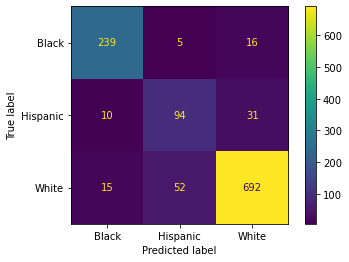

In [279]:
y_test_pred= svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(svm_model_grid,X_test_scaled,y_test);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

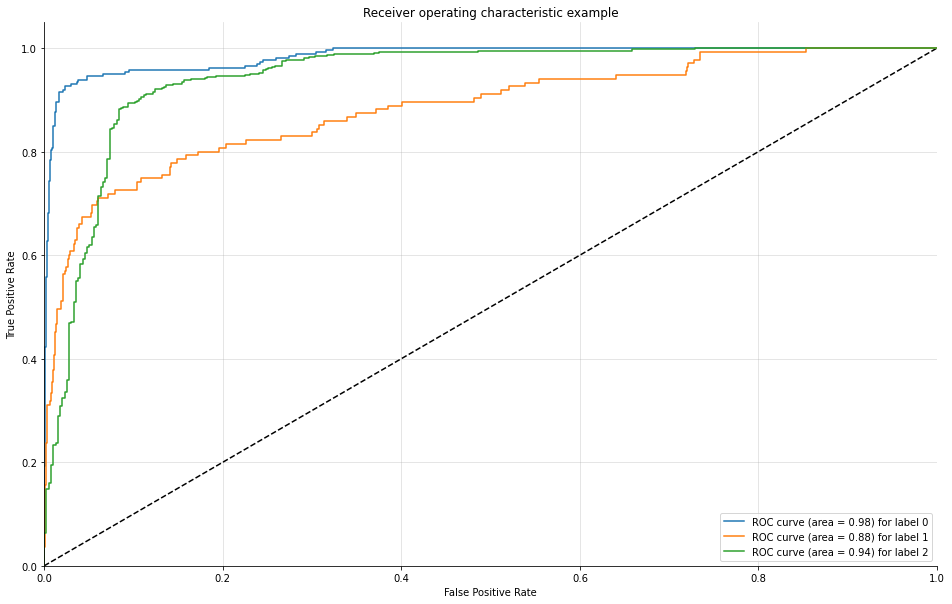

In [280]:
plot_multiclass_roc(svm_model_grid, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

## Xgboost Over/ Under Sampling

In [281]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[6,8],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5],
              "colsample_bytree":[0.5, 1]}

In [282]:
xgb_model = XGBClassifier()
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring=f1_Hispanic, n_jobs = -1,refit=True, verbose = 2).fit(X_resampled, y_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [283]:
xgb_grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 300,
 'subsample': 0.5}

[[226   2  32]
 [ 10  66  59]
 [ 12  17 730]]
              precision    recall  f1-score   support

       Black       0.91      0.87      0.89       260
    Hispanic       0.78      0.49      0.60       135
       White       0.89      0.96      0.92       759

    accuracy                           0.89      1154
   macro avg       0.86      0.77      0.80      1154
weighted avg       0.88      0.89      0.88      1154



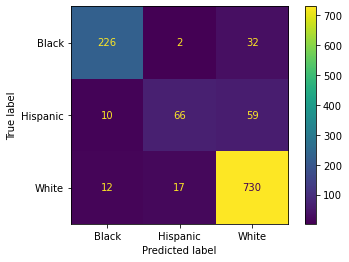

In [284]:
y_test_pred= xgb_grid_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(xgb_grid_model,X_test_scaled,y_test);

[10:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[226   2  32]
 [ 10  55  70]
 [ 13   7 739]]
              precision    recall  f1-score   support

       Black       0.91      0.87      0.89       260
    Hispanic       0.86      0.41      0.55       135
       White       0.88      0.97      0.92       759

    accuracy                           0.88      1154
   macro avg       0.88      0.75      0.79      1154
weighted avg       0.88      0.88      0.87      1154



<IPython.core.display.Javascript object>


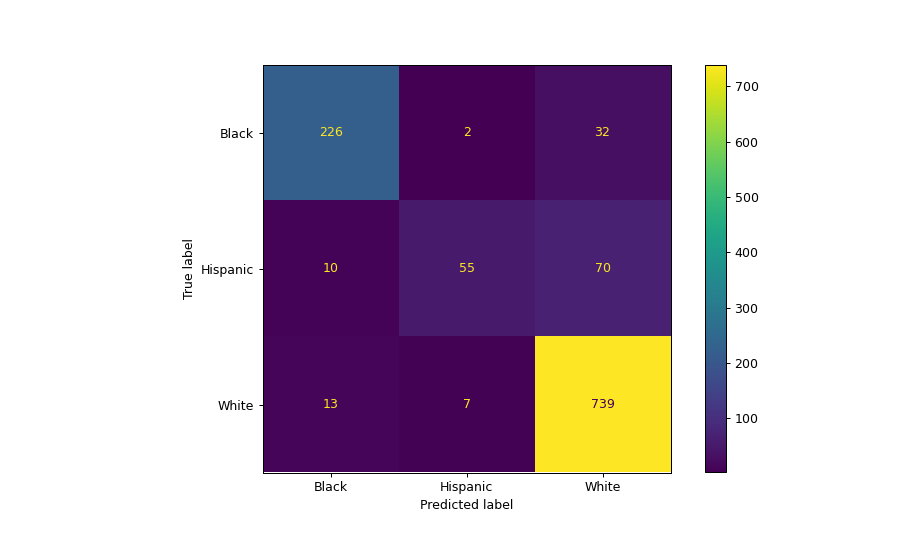

In [78]:
model_best = XGBClassifier(colsample_bytree=1,
                             learning_rate=0.1,
                             max_depth=8,
                             n_estimators=300,
                             subsample=0.5).fit(X_train_scaled, y_train)

y_test_pred= model_best.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(model_best, X_test_scaled, y_test)

In [79]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.7609992725884642

In [80]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_test_pred)

0.7505939353275797

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

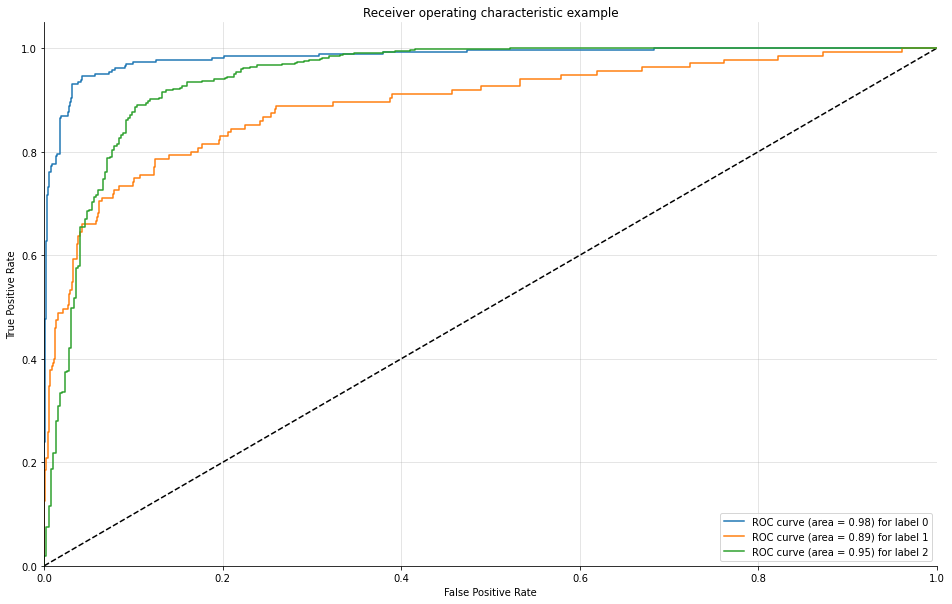

In [287]:
plot_multiclass_roc_for_tree(xgb_grid_model, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

In [ ]:
plot_multiclass_roc_for_tree(model_best, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

---
---

---
---